## A short tutorial on lunarc cluster


#### The steps to log in to lunarc through Thinlink Client and have access to the files on snic2020-06-41 and game files.

####  snic2020-06-41 is our storage project on lunarc and exists on /lunarc/nobackup/projects/ directory.

created by me: Salma :)

June 18, July 21, 2020

#### You can download Thinlink from the following link for any os you are using:

https://www.cendio.com/thinlinc/download

file:///home/salma/Desktop/Screenshot%20from%202020-06-18%2010-40-07.png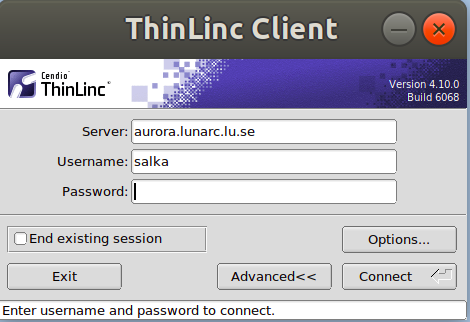

After password, you must enter the pocket pass which you can download and activate as following steps:
https://lunarc-documentation.readthedocs.io/en/latest/authenticator_howto/

file:///home/salma/Desktop/pocket_pass.png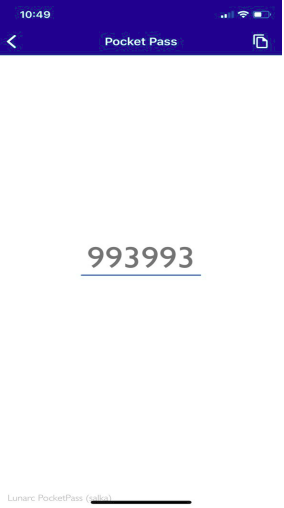

Then you will see the screen of lunarc as following:
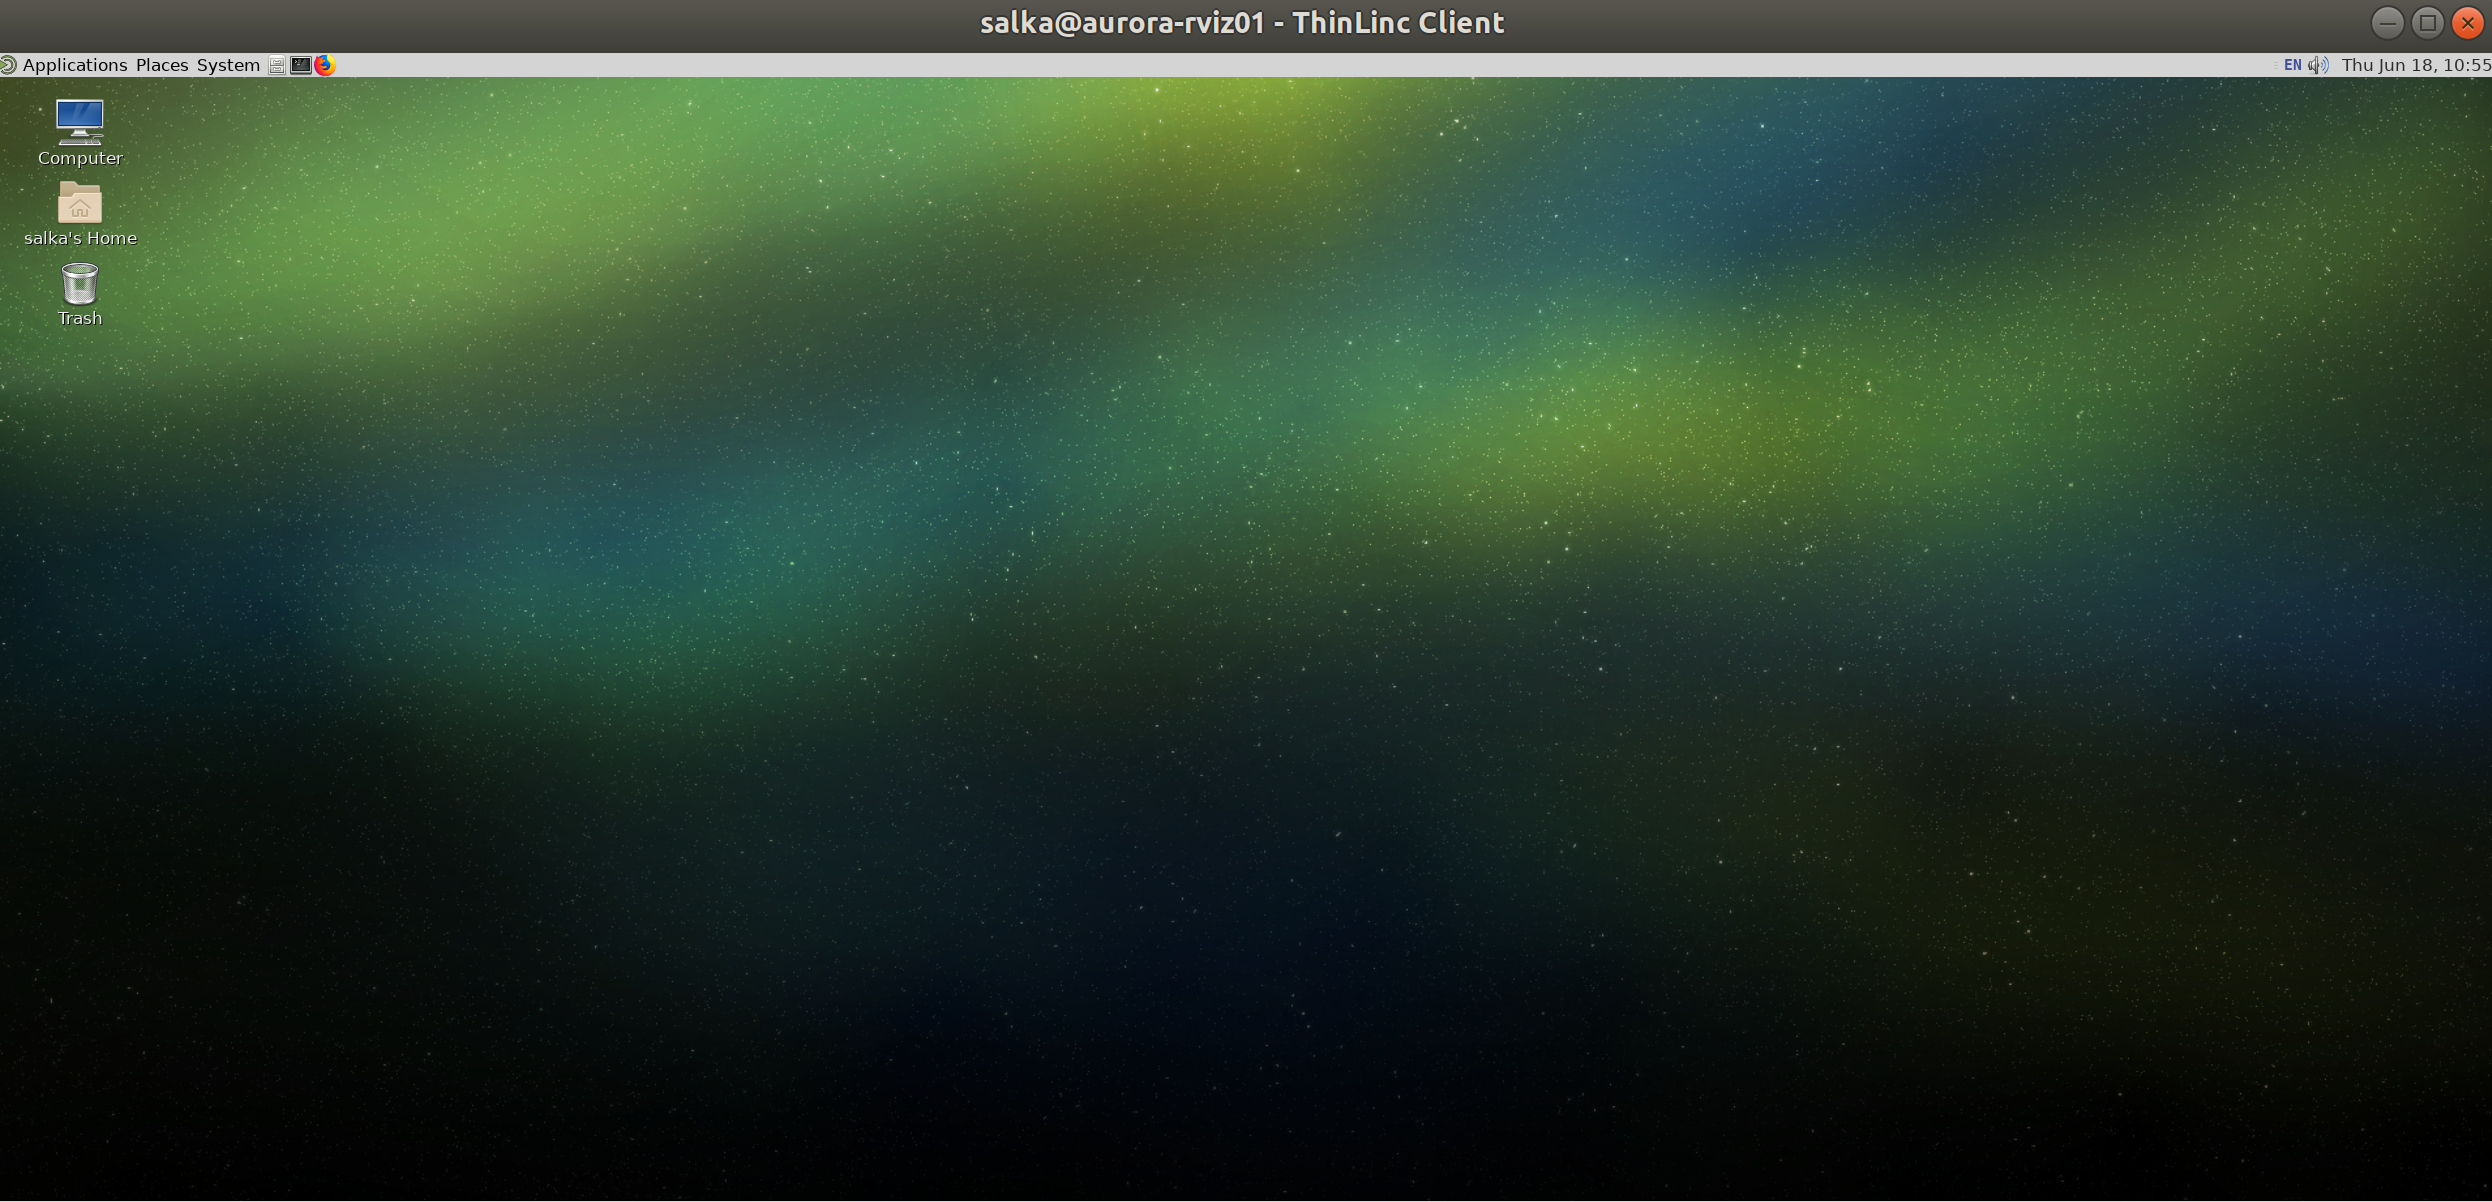


you can find game files and other files on the /lunarc/nobackup/projects/snic2020-6-41/

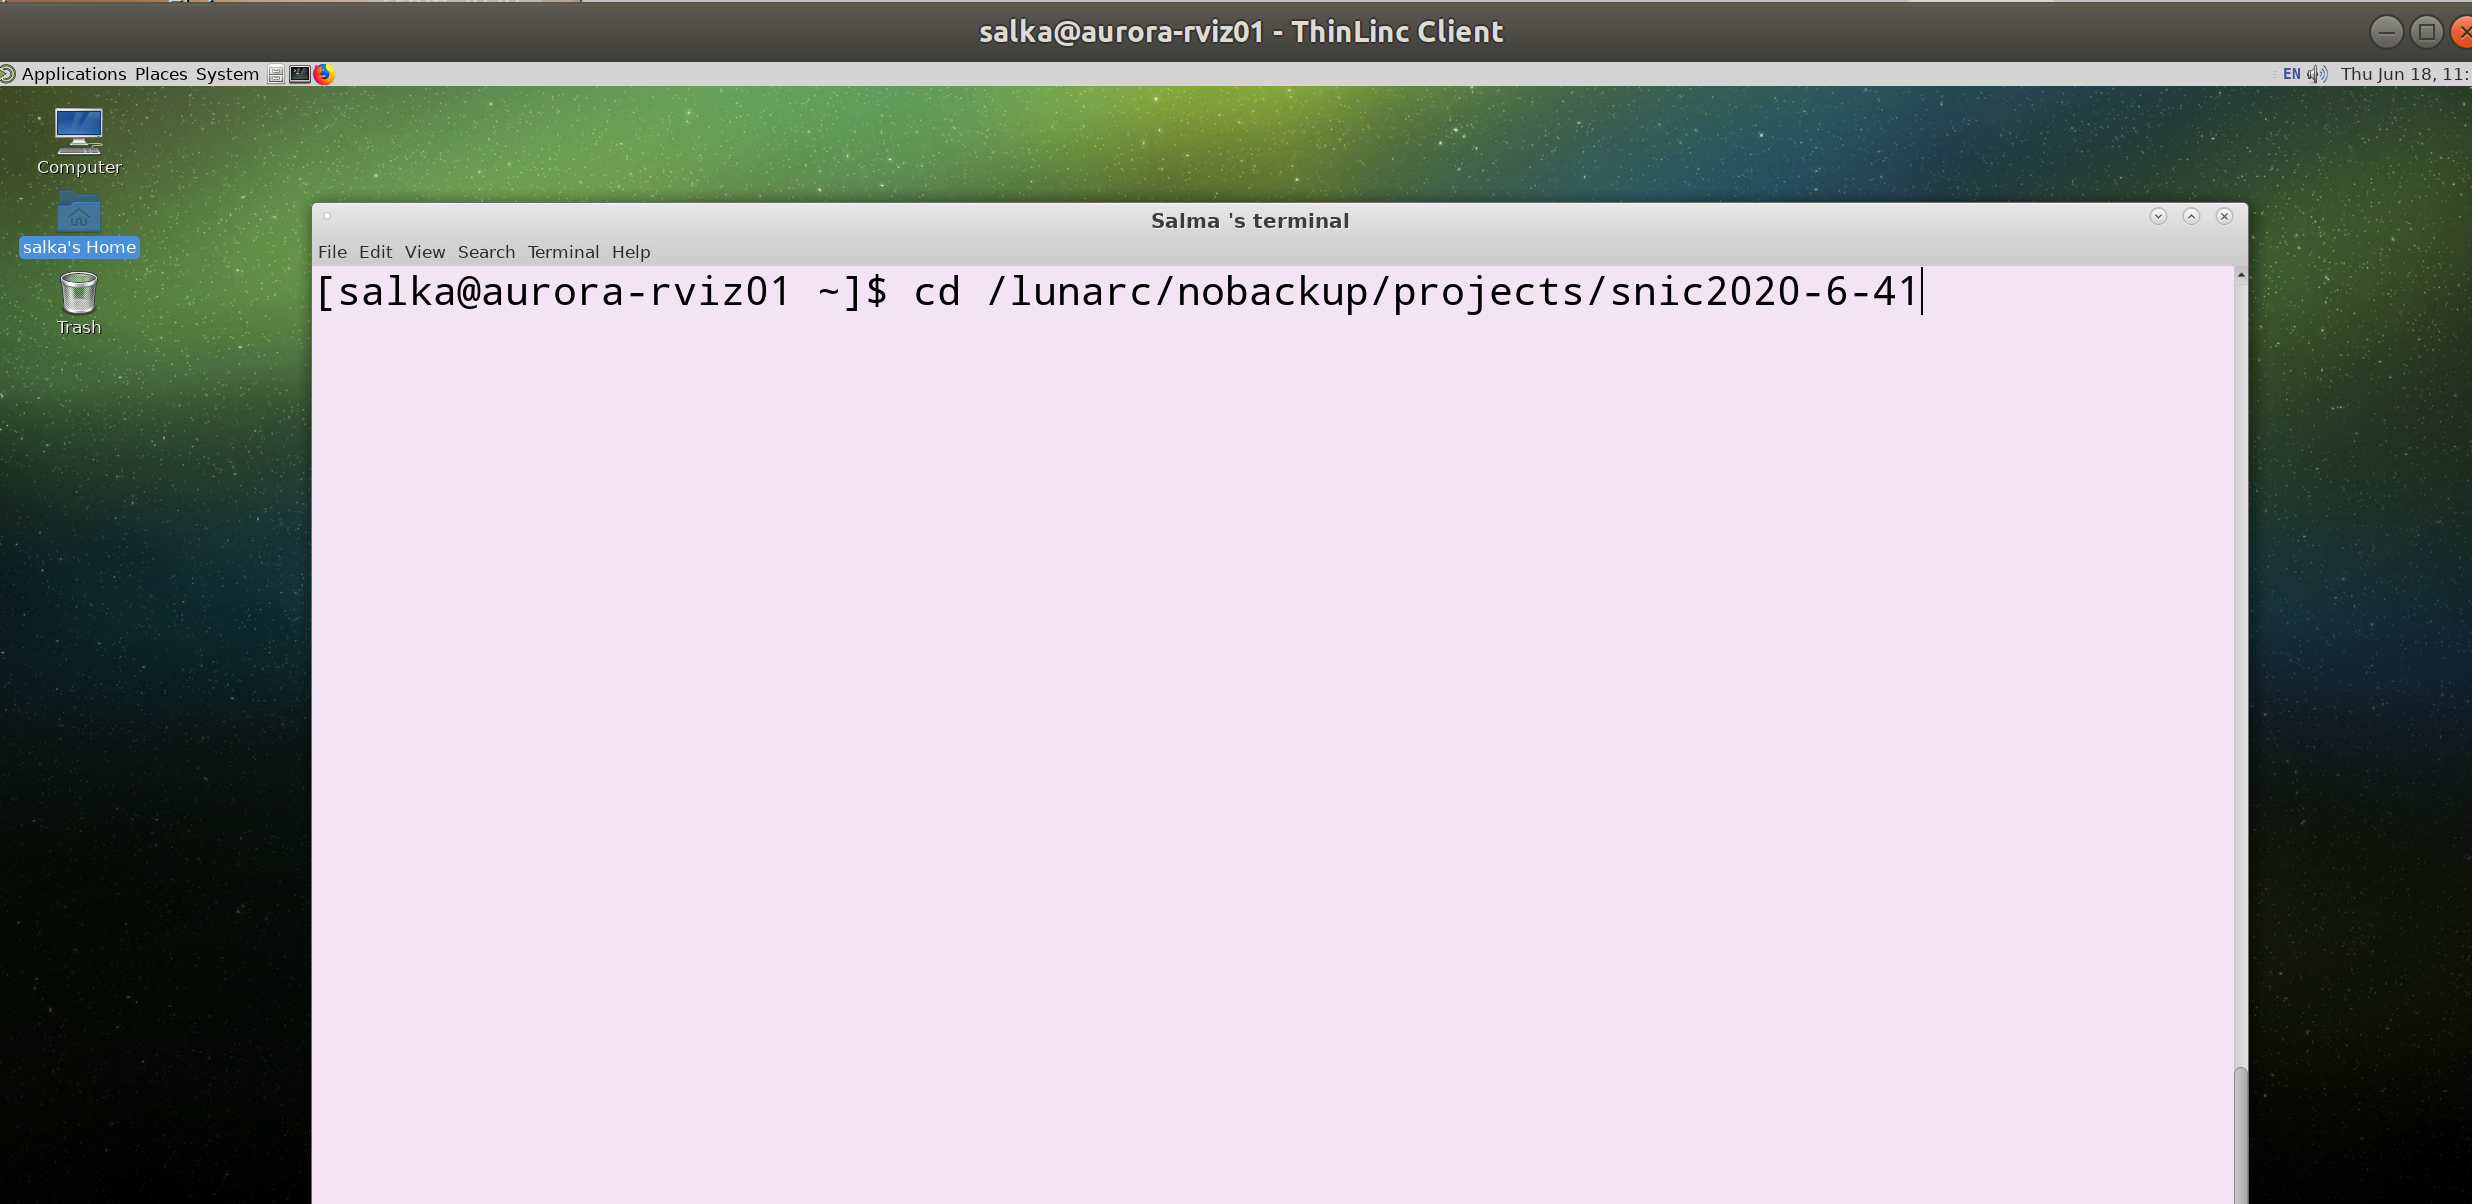

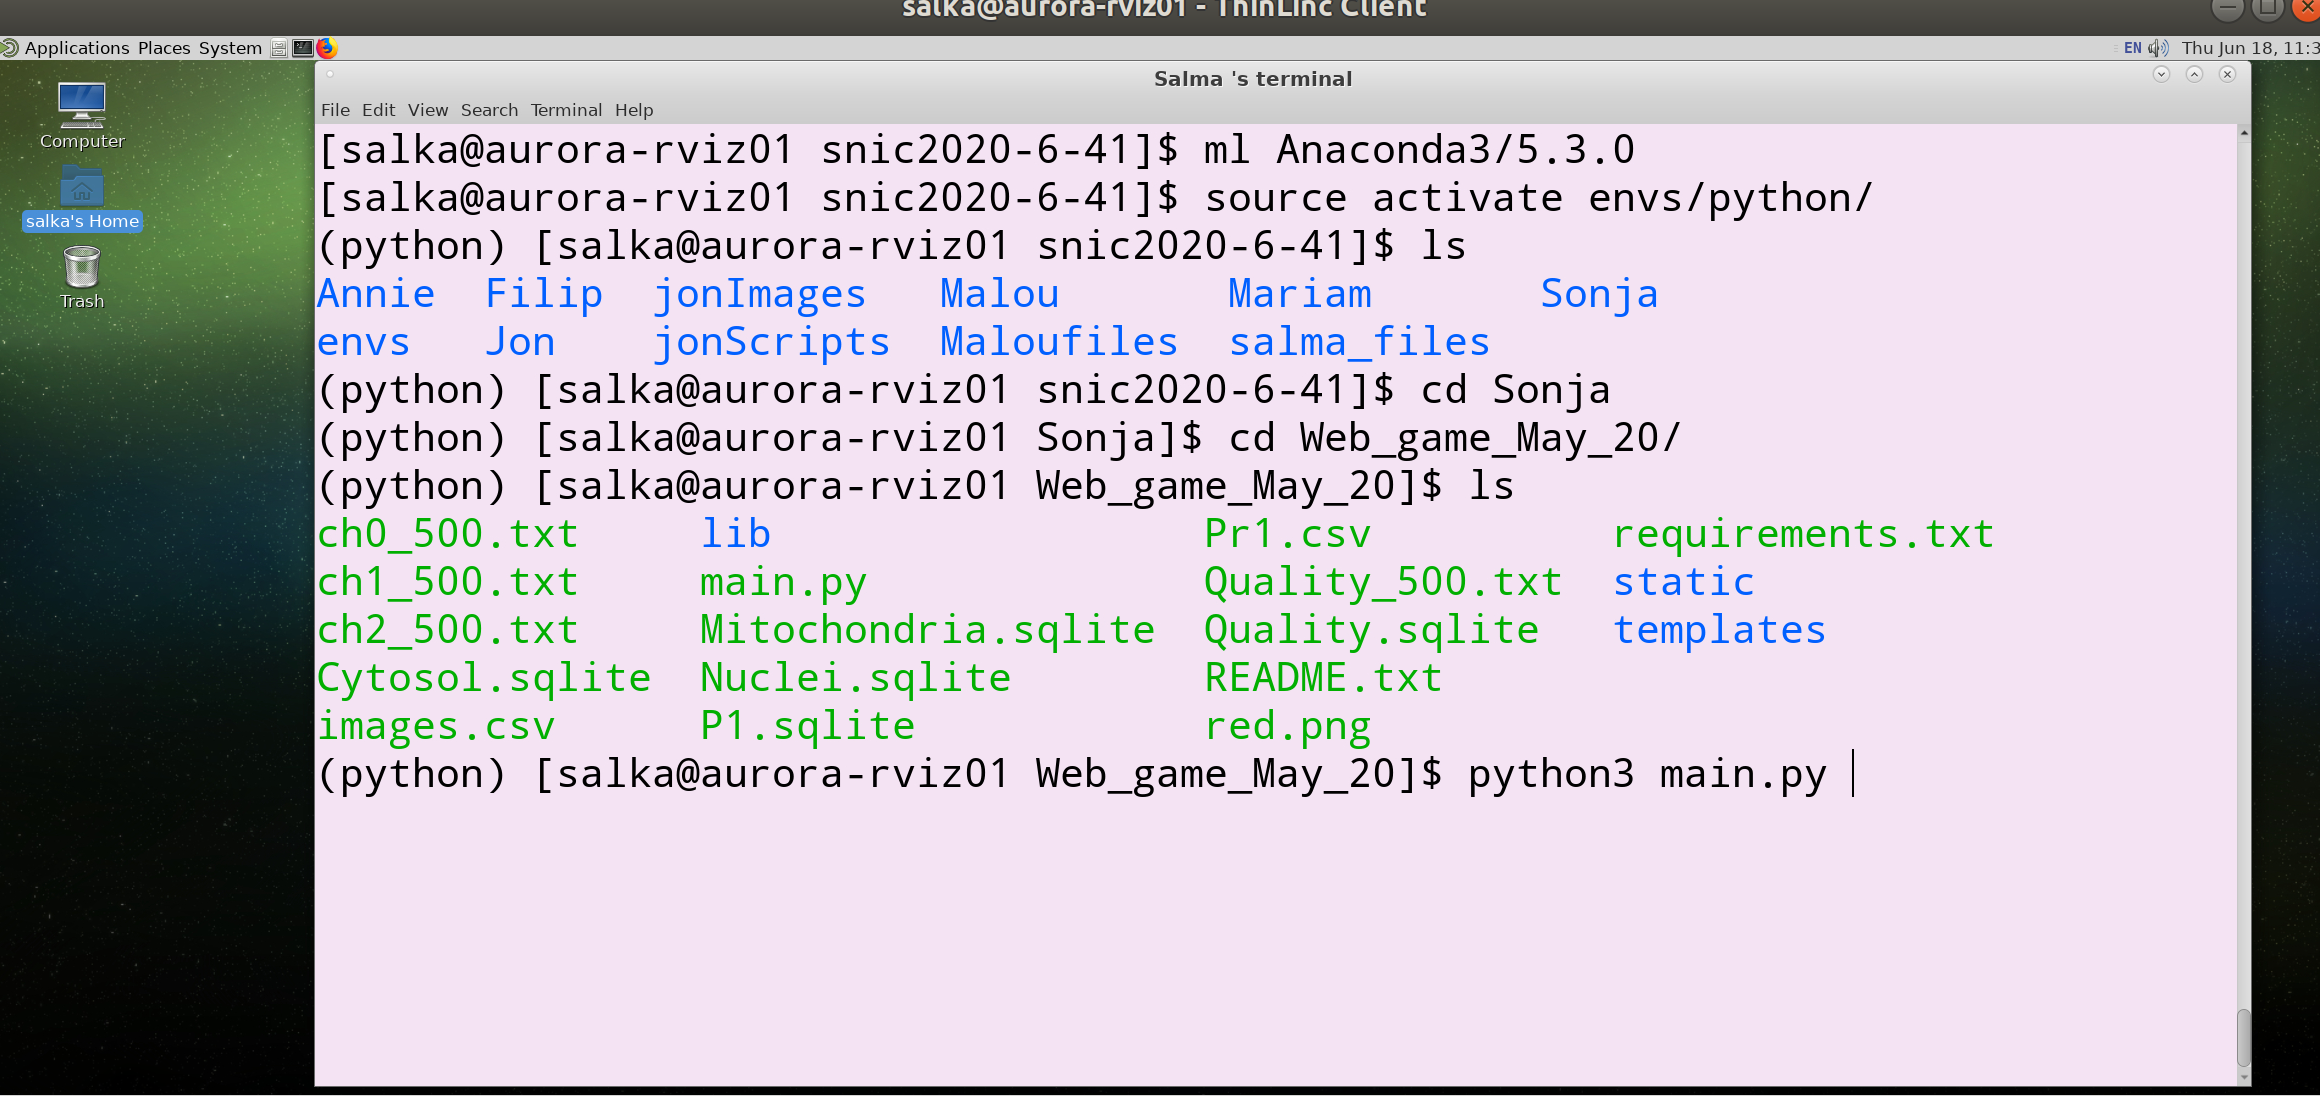

### How to create and activate conda envionment in lunarc

I have created a conda environment and I think you can simply activate it. However, if it does not work, you can create your own conda environment step by step as following and add any packages that you need in your projects.

You can find a thorough tutorial on how to create an environment on the following link:
https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

in lunarc we need to first load the Anaconda installed on lunarc

    module purge

    module load Anaconda3/5.3.0


To create an environment with a specific version of Python:

    conda create -n myenv python=3.6

To create an environment with a specific package:

    conda create -n myenv scipy

OR:

    conda create -n myenv python
    conda install -n myenv scipy

To create an environment with a specific version of a package:

    conda create -n myenv scipy=0.15.0

OR:

    conda create -n myenv python
    conda install -n myenv scipy=0.15.0

To create an environment with a specific version of Python and multiple packages:

    conda create -n myenv python=3.6 scipy=0.15.0 astroid babel


You can control where a conda environment lives by providing a path to a target directory when creating the environment by

    conda create --prefix /home/username/envs/envname python=3.6.5 opencv scikit-learn glob2 ....

"username" is the username for lunarc account and "envname" is the desired name for the environment.

    Proceed ([y]/n)? y

After creating the environment you'll have to activate it:

    conda activate /home/username/envs/envname

Now you can install the needed packages you want by pip install package or conda install package:

    pip install Pillow==6.1.0 scipy==1.0.0 ....

    conda install -c conda-forge umap-learn

Proceed ([y]/n)? y


After you're done with running your script(s):

    conda deactivate


If you want to minimize the thinlink and go back to your screen you can see the options by pressing F8 button.

### How to run a script or submit a job on lunarc

For writing a code or edit it through terminal you can use vim, nano, 

and after saving the file you can simply run it by python script.py.

** Please note that for running python scripts you should first activate the environment and then run any script or even start a jupyter notebook.

For testing a simple code it's fine if we run in terminal. However, for running heavy tasks we must submit a job and NOT run it in front end (user terminal).



### A job script
We can create a simple myjob.sh file like the following sample:

touch myjob.sh

nano myjob.sh

copy the following lines in it and then save and close (Ctrl+O, enter, Ctrl+x)
#################################################################################
#!/bin/bash

#SBATCH -A lu2020-2-10  #name of the lu project


#SBATCH -p gpu          # this line and the next is applying for gpu
#SBATCH --gres=gpu:1    # number of gpus 


#SBATCH -p lu           #If you need only cpu for running your job 


#SBATCH -n 1
#SBATCH --mail-user = email
#SBATCH --mail-type=END
#SBATCH -J name_of_job
#SBATCH -t 1:00:00     #Approximated time needed for running your code
#SBATCH -o outfile.out #
#SBATCH -e errfile.err #
#SBATCH --mem-per-cpu=3200 #If you need more memory you can increase this and automatically more cores will be allocated to your code

#In this part you can write all the commands you were going to write in the terminal
#you can even activate your environment here before runnung your code
ml Anaconda/5.3.0


source activate myenv
python3  my_script.py
......
deactivate myenv
##################################################################################


### submit a job 

For submit a job we only need the following command:

    sbatch myjob.sh

and we will receive a jobid

We can check the status of our job by

    squeue -u username

and 

    scancel jobid

for cancelling the job


If there would be any runtime error or other, we can find in .err file and the output of the script on .out file.

### For detailed explanations you can always refer to the lunarc support page on the following link:

https://lunarc-documentation.readthedocs.io/en/latest/login_howto/




### Using gpu on lunarc
#################################################################################
#!/bin/bash

#SBATCH -A lu2020-2-10  #name of the lu project


#SBATCH -p gpu          # this line and the next is applying for gpu
#SBATCH --gres=gpu:1    # number of gpus 


#SBATCH -n 1
#SBATCH --mail-user = email
#SBATCH --mail-type=END
#SBATCH -J name_of_job
#SBATCH -t 1:00:00     #Approximated time needed for running your code
#SBATCH -o outfile.out #
#SBATCH -e errfile.err #
#SBATCH --mem-per-cpu=3200 #If you need more memory you can increase this and automatically more cores will be allocated to your code

#In this part you can write all the commands you were going to write in the terminal
#you can even activate your environment here before runnung your code
ml Anaconda/5.3.0


source activate myenv
python3  my_script.py
......
deactivate myenv
##################################################################################




We can use 

#SBATCH -p gpuk20

and the run starts much faster on k20 gpu nodes. 